In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading Data**


In [18]:
data= pd.read_csv("./data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Data Analysis**

## **metadata:**

### **1. Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
### **2. BloodPressure:** Diastolic blood pressure (mm Hg)
### **3. SkinThickness:** Triceps skin fold thickness (mm)
### **4. Insulin:** 2-Hour serum insulin (mu U/ml) 
### **5. BMI:** Body mass index (weight in kg/(height in m)^2)
### **6. DiabetesPedigreeFunction:** Diabetes Pedigree Function
### **7. Age:** Age in years


In [19]:
len(data)

768

In [20]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
data.isnull().value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI    DiabetesPedigreeFunction  Age    Outcome
False        False    False          False          False    False  False                     False  False      768
dtype: int64

## **there is no null values in the dataset**
### **data set ready for further process**


In [22]:
(data["Outcome"]==1).value_counts()

False    500
True     268
Name: Outcome, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [24]:
y=data["Outcome"]
X=data.drop("Outcome", axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# **Model training**

### ***Logistic Regression***

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline


In [74]:
logReg=LogisticRegression(solver='liblinear', multi_class='auto')

In [75]:
logReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [76]:
log_pred=logReg.predict(X_test)

In [77]:
print(f'Model Accuracy of Logistic Regression is: {metrics.accuracy_score(y_test, log_pred)}')

Model Accuracy of Logistic Regression is: 0.7402597402597403


# Confusion matrix

<AxesSubplot: >

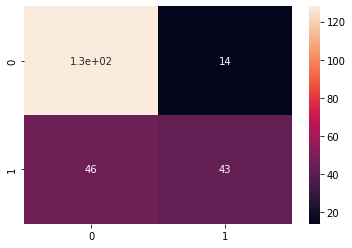

In [96]:
matrix= metrics.confusion_matrix(y_test, log_pred)
sns.heatmap(matrix, annot=True)

In [78]:
# model_params= {
#     'svm':{
#         'model':svm.SVC(gamma='auto', probability= True),
#         'params':{
#             'svc__C':[1,10,100,1000],
#             'svc__kernel':['rbf', 'linear']
#         }
#     },
#     'random_forest':{
#         'model': RandomForestClassifier(),
#         'params':{
#             'randomforestclassifier__n_estimators':[1,5,10]

#         }       
#     },
#     'Logistic_Regression':{
#         'model': LogisticRegression(solver='liblinear', multi_class='auto'),
#         'params':{
#             'logisticregression__C': [1,5,10]
#         }
#     }
# }

In [79]:
# score=[]
# best_estimators=[]
# for algo, mp in model_params.items():
#     # print(x)
#     # print(f'Creating the pipeline for {algo}')
#     pipe= make_pipeline(mp['model'])
#     clf=GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)  #for cross validation
#     print(f'fitting data to {algo}')
#     clf.fit(X_train, y_train)
#     score.append(
#         {
#             'model': algo,
#             'best_score':clf.best_score_,
#             'best_params':clf.best_params_
#         })
#     best_estimators[algo]=clf.best_estimators

# model_res=pd.DataFrame(score, columns=['Model', 'best_score', 'best_params'])

# **RandomForest Classifier**

In [80]:
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [81]:
rf_pred=rf.predict(X_test)
print(f'Model Accuracy of RandomForest is: {metrics.accuracy_score(y_test, rf_pred)}')

Model Accuracy of RandomForest is: 0.7186147186147186


## Confusion matrix

<AxesSubplot: >

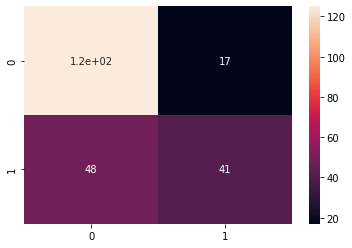

In [95]:
matrix= metrics.confusion_matrix(y_test, rf_pred)
sns.heatmap(matrix, annot=True)

# **Decision Tree**

In [92]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0, max_depth=2)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [93]:
dtc_pred=dtc.predict(X_test)
print(f'Model Accuracy of Decision Tree is: {metrics.accuracy_score(y_test, dtc_pred)}')

Model Accuracy of Decision Tree is: 0.7748917748917749


## Confusion Matrix

<AxesSubplot: >

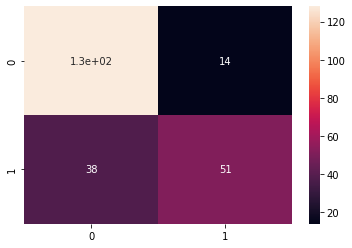

In [94]:
matrix= metrics.confusion_matrix(y_test, dtc_pred)
sns.heatmap(matrix, annot=True)

In [99]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [123]:
def predict_diabetes(preg, gluc, bp, skithik, insulin, bmi, dpf, age):
    x =np.zeros(len(X.columns))
    x[0] = preg
    x[1] = gluc
    x[2] = bp
    x[3] = skithik
    x[4] = insulin
    x[5] = bmi
    x[6] = dpf
    x[7] = age

    return dtc.predict([x])[0]

In [124]:
predict_diabetes(4, 156, 75, 0, 0, 48.3, 0.238, 32)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

<AxesSubplot: >

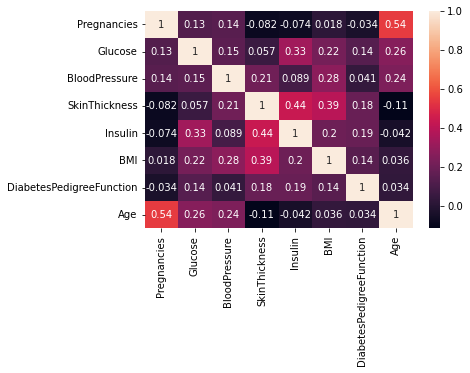

In [125]:
sns.heatmap(X.corr(), annot=True)

# **saving the trained model**

In [126]:
import pickle
with open('Diabetes_classifier.pickle','wb') as f:
    pickle.dump(dtc,f)

### **Loading model and check**

In [132]:
model= pickle.load(open('Diabetes_classifier.pickle', 'rb'))


In [133]:
def predict_model(preg, gluc, bp, skithik, insulin, bmi, dpf, age):
    x =np.zeros(len(X.columns))
    x[0] = preg
    x[1] = gluc
    x[2] = bp
    x[3] = skithik
    x[4] = insulin
    x[5] = bmi
    x[6] = dpf
    x[7] = age

    return model.predict([x])[0]

In [134]:
predict_model(4, 156, 75, 0, 0, 48.3, 0.238, 32)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1